In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
list_1  = [[88,87,92],[92,94,91],[75,72,79],[50,75,82],[42,67,55],[42,33,29],[27,32,45],[65,58,89],[53,48,76],[76,77,78],[65,75,59],
          [46,72,68],[73,45,69],[83,59,87],[79,83,56],[67,72,49],[36,29,26],[45,53,48],[29,31,34],[75,59,54],[76,76,42],[45,39,79],
          [56,52,87],[57,85,61],[53,76,49],[76,82,61],[36,62,51],[78,41,83],[78,82,56],[52,61,49],[23,27,56],[38,61,43],[63,67,42],
          [67,83,79],[82,53,79],[73,45,83],[39,61,67],[73,81,53],[23,21,27],[19,43,51],[46,21,51],[56,49,23],[62,65,69],[94,72,81],
          [64,89,72],[59,67,87],[45,71,68],[70,44,69],[69,71,46],[34,44,32],[39,65,76],[72,67,41],[68,42,71],[42,40,71],[43,69,51],
          [74,39,46],[56,67,62],[54,52,57],[78,61,62],[64,81,71],[54,61,77]]

In [3]:
df = pd.DataFrame(list_1,columns = ['subject_1','subject_2','subject_3'])

In [13]:
df.shape

(61, 3)

In [4]:
df.head()

,subject_1,subject_2,subject_3
0,88,87,92
1,92,94,91
2,75,72,79
3,50,75,82
4,42,67,55


In [5]:
from sklearn.cluster import KMeans

In [6]:
inertia_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

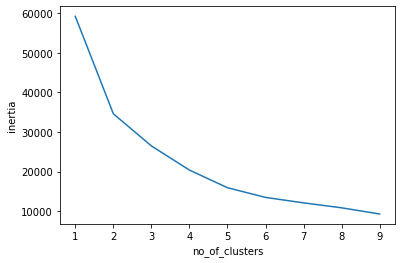

In [7]:
plt.plot(range(1,10),inertia_list)
plt.xlabel('no_of_clusters')
plt.ylabel('inertia')

From the above graph it appears k=5 is best choice(using elbow method)

In [8]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(n_clusters=5)

In [9]:
kmeans.cluster_centers_

array([[71.38461538, 73.92307692, 52.46153846],
       [63.92857143, 48.        , 74.85714286],
       [33.5       , 33.        , 37.4       ],
       [45.23076923, 64.38461538, 57.23076923],
       [73.81818182, 77.81818182, 81.72727273]])

In [10]:
kmeans.labels_

array([4, 4, 4, 4, 3, 2, 2, 1, 1, 4, 0, 3, 1, 4, 0, 0, 2, 3, 2, 0, 0, 1,
       1, 0, 3, 0, 3, 1, 0, 3, 2, 3, 0, 4, 1, 1, 3, 0, 2, 2, 2, 2, 1, 4,
       4, 4, 3, 1, 0, 2, 3, 0, 1, 1, 3, 1, 3, 3, 0, 4, 1])

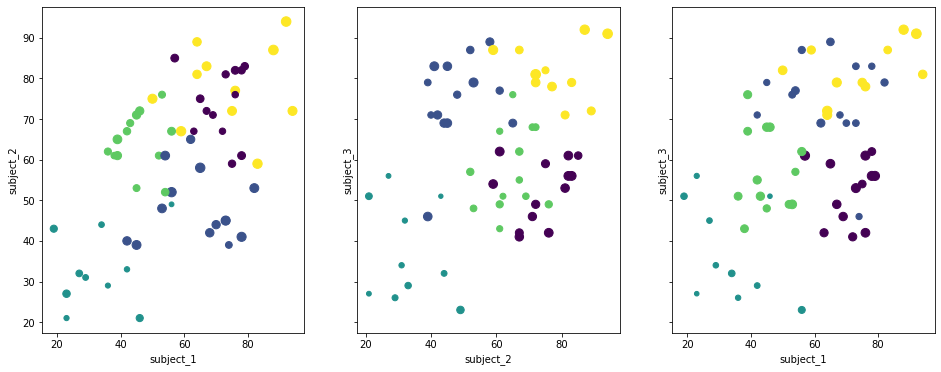

In [11]:
f, ax = plt.subplots(1,3,sharey=True,figsize=(16,6))
ax[0].set_xlabel('subject_1')
ax[0].set_ylabel('subject_2')
ax[0].scatter(df['subject_1'],df['subject_2'],s=df['subject_3'],c=kmeans.labels_,cmap='viridis')

ax[1].set_xlabel('subject_2')
ax[1].set_ylabel('subject_3')
ax[1].scatter(df['subject_2'],df['subject_3'],s=df['subject_1'],c=kmeans.labels_,cmap='viridis')

ax[2].set_xlabel('subject_1')
ax[2].set_ylabel('subject_3')
ax[2].scatter(df['subject_1'],df['subject_3'],s=df['subject_2'],c=kmeans.labels_,cmap='viridis')